In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.layers import Dense,Activation,Flatten,Dropout,BatchNormalization,Input
from keras.models import Sequential,Model
import keras.backend as K

In [7]:
train = pd.read_csv('MNIST/train.csv')
print(train.shape)
train = train[:1000]

target = train['label']
del train['label']

train = train.astype('float32') / 255.

(42000, 785)


In [21]:
print(train.head())
print(train.shape)

   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0   

In [23]:
print(target.shape)
print(train.shape)


(1000,)
(1000, 784)


In [36]:
img = Input(shape=(784,))

encoder = Dense(128,activation='relu')(img)
encoder = Dense(128,activation='relu')(encoder)
encoder = Dense(64,activation='relu')(encoder)
encoder = Dense(64,activation='relu')(encoder)
decoder = Dense(256,activation='sigmoid')(encoder)
decoder = Dense(512,activation='sigmoid')(decoder)
decoder = Dense(784,activation='sigmoid')(decoder)
decoder = Dense(784,activation='sigmoid')(decoder)


encoder_model = Model(img,encoder)
decoder_model = Model(img,decoder)


encoder_model.compile(loss='binary_crossentropy',optimizer='adam')
decoder_model.compile(loss='binary_crossentropy',optimizer='adam')


In [38]:
decoder_model.fit(train,train,epochs=50,batch_size=16)

Epoch 1/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.2416
Epoch 2/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.2401
Epoch 3/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.2382
Epoch 4/50
1000/1000 [==============================] - 3s 3ms/step - loss: 0.2339
Epoch 5/50
1000/1000 [==============================] - 3s 3ms/step - loss: 0.2260
Epoch 6/50
1000/1000 [==============================] - 3s 3ms/step - loss: 0.2229
Epoch 7/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.2201
Epoch 8/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.2182
Epoch 9/50
1000/1000 [==============================] - 3s 3ms/step - loss: 0.2149
Epoch 10/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.2137
Epoch 11/50
1000/1000 [==============================] - 3s 3ms/step - loss: 0.2116
Epoch 12/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.2098
E

In [39]:
pred = decoder_model.predict(train)

In [40]:
print(pred.shape)
print(pred[0].shape)

(1000, 784)
(784,)


/home/pritam/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys


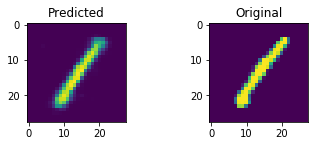

In [45]:
plt.subplot(2,2,1)
x = pred[0].reshape(28,28)
plt.title("Predicted")
plt.imshow(x)
plt.subplot(2,2,2)
plt.title("Original")
plt.imshow(train.iloc[0].reshape(28,28))